In [4]:
import polars as pl
import numpy as np

# 读取数据
data = pl.read_parquet("hourly_data.pa")

df = data.sort('open_time').sort("symbol")

df = df.with_columns([
    (pl.col('volume') - pl.col('taker_buy_volume')).alias('taker_sell_volume'),
    (pl.col('quote_volume') - pl.col('taker_buy_quote_volume')).alias('taker_sell_quote_volume'),
    (pl.col('close') / (pl.col('close').shift(1).over('symbol')) - 1).alias('return')
])

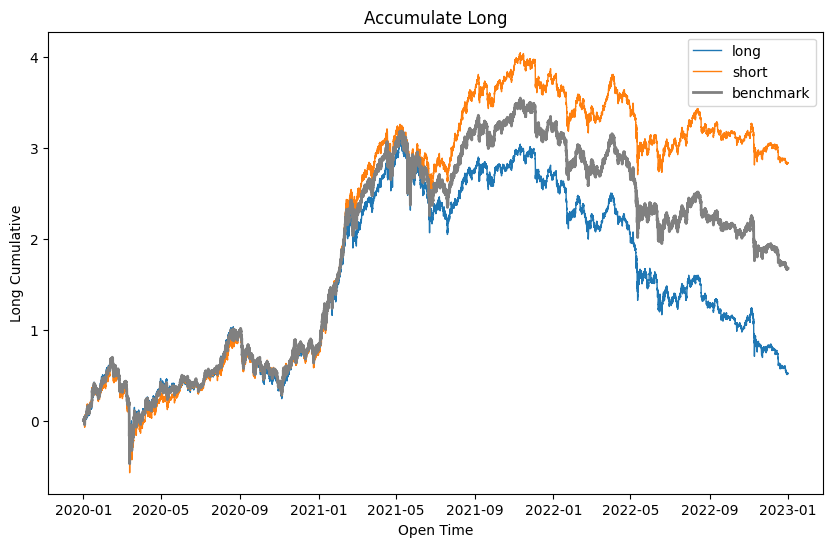

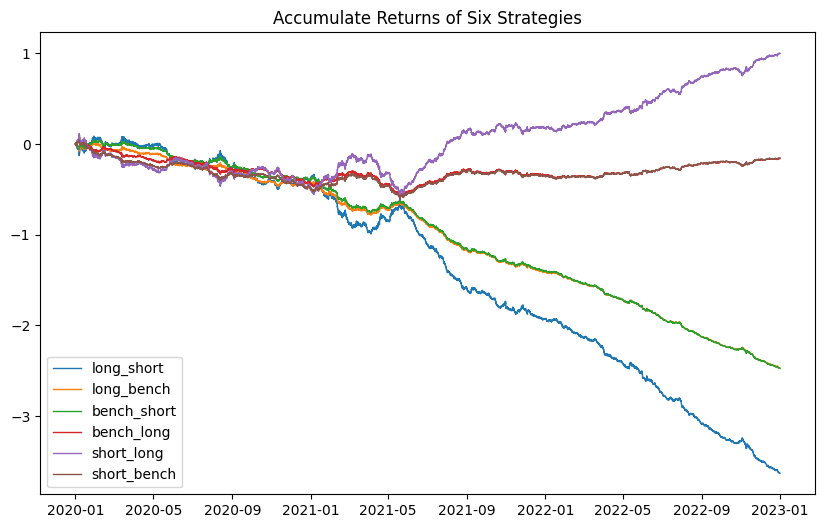

long: 
ann_return = 0.1729  sharpe = 0.1575  maxdd = 0.6642  calmar_ratio = 0.2603  

short: 
ann_return = 0.9436  sharpe = 0.8636  maxdd = 0.7413  calmar_ratio = 1.2729  

bench: 
ann_return = 0.5575  sharpe = 0.513  maxdd = 0.6895  calmar_ratio = 0.8085  

long_short: 
ann_return = -1.2087  sharpe = -4.4583  maxdd = 3.4225  calmar_ratio = -0.3532  

long_bench: 
ann_return = -0.8226  sharpe = -6.0086  maxdd = 2.4509  calmar_ratio = -0.3356  

bench_long: 
ann_return = -0.0534  sharpe = -0.3898  maxdd = 0.6251  calmar_ratio = -0.0854  

short_long: 
ann_return = 0.3327  sharpe = 1.2271  maxdd = 0.655  calmar_ratio = 0.5079  

short_bench: 
ann_return = -0.052  sharpe = -0.3817  maxdd = 0.6357  calmar_ratio = -0.0817  

bench_short: 
ann_return = -0.824  sharpe = -6.0532  maxdd = 2.4205  calmar_ratio = -0.3404  



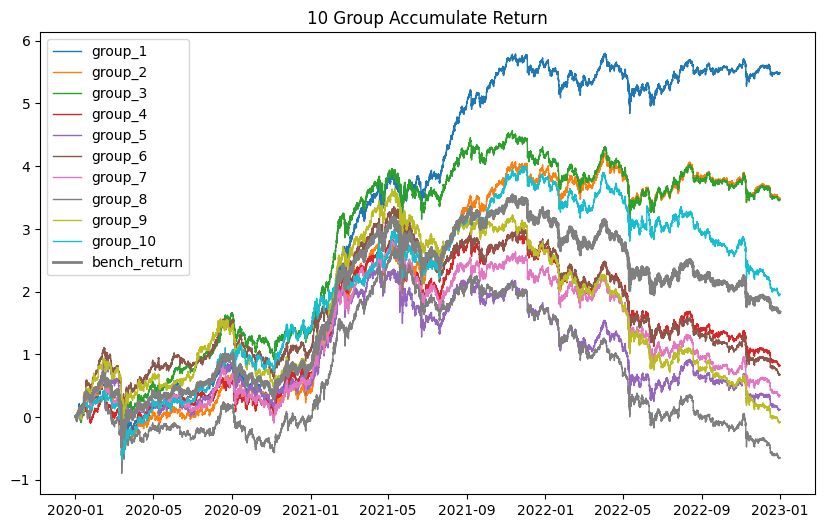

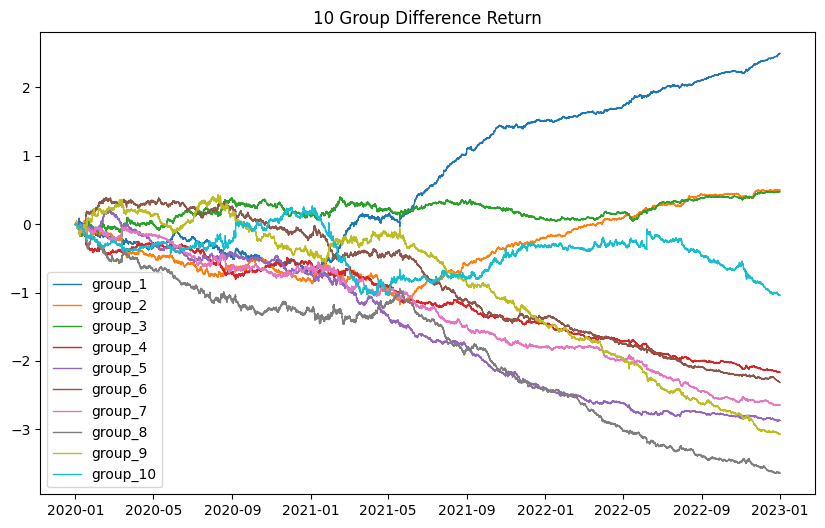

group_1: 
ann_return = 1.8276  sharpe = 1.6639  maxdd = 0.78  calmar_ratio = 2.343  

group_2: 
ann_return = 1.1614  sharpe = 1.0232  maxdd = 0.8004  calmar_ratio = 1.451  

group_3: 
ann_return = 1.1533  sharpe = 1.0153  maxdd = 0.7522  calmar_ratio = 1.5332  

group_4: 
ann_return = 0.2737  sharpe = 0.2429  maxdd = 0.7765  calmar_ratio = 0.3524  

group_5: 
ann_return = 0.0397  sharpe = 0.0351  maxdd = 0.6931  calmar_ratio = 0.0572  

group_6: 
ann_return = 0.2245  sharpe = 0.1954  maxdd = 0.6166  calmar_ratio = 0.3641  

group_7: 
ann_return = 0.1142  sharpe = 0.098  maxdd = 0.6905  calmar_ratio = 0.1654  

group_8: 
ann_return = -0.2176  sharpe = -0.1854  maxdd = 0.9228  calmar_ratio = -0.2358  

group_9: 
ann_return = -0.0265  sharpe = -0.0223  maxdd = 0.8054  calmar_ratio = -0.0329  

group_10: 
ann_return = 0.6504  sharpe = 0.5757  maxdd = 0.7862  calmar_ratio = 0.8272  

-----------------------------------------
group_difference_1: 
ann_return = 0.8321  sharpe = 2.9027  maxdd =

In [5]:
factors = df.select(['open_time', 'symbol', 'taker_buy_quote_volume'])

from factor_analysis.factor_analysis import FactorAnalysis

# 使用示例
analysis = FactorAnalysis(factors, data)
analysis.run_full_analysis()